<a href="https://colab.research.google.com/github/LinjingBi/ai_robotics_lab/blob/main/week4/lab_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
from sklearn.datasets import make_blobs, load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
plt.style.use('tableau-colorblind10')

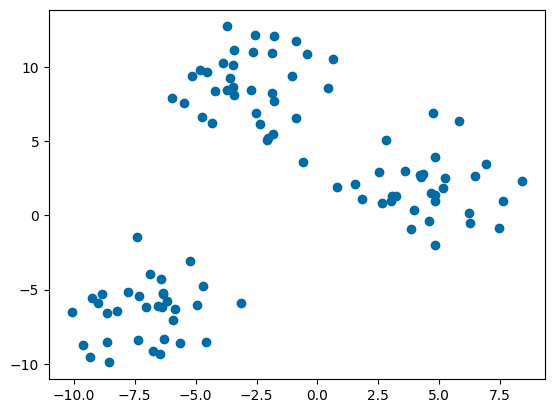

In [ ]:
X, y = make_blobs(centers=3, n_samples=100, cluster_std=2, random_state=42)
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])

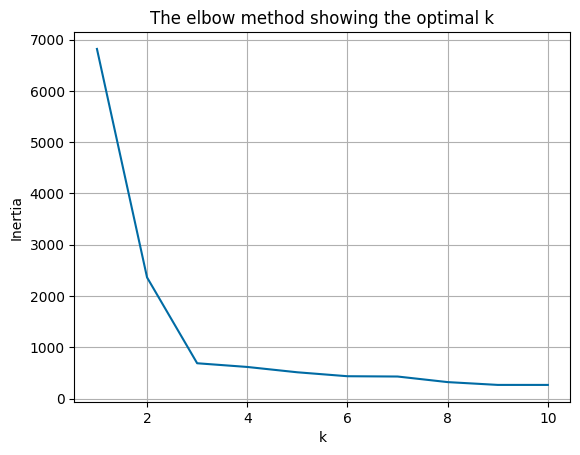

In [ ]:
def inertia(X, labels, centroids):  # wcss
  assigned_centro = centroids[labels]
  MSCC = ((X - assigned_centro) ** 2).sum()
  return MSCC


# model = KMeans(n_clusters=4).fit(X)
# print(X.shape)
# print(X[0]-model.cluster_centers_[0])
# print(model.labels_.shape)
# print(model.cluster_centers_.shape)

msccs = []

K = 10

for i in range(1, K+1):
  km = KMeans(n_clusters = i).fit(X)
  mscc = inertia(X, km.labels_, km.cluster_centers_)
  msccs.append(mscc)

plt.grid(True)
plt.plot(range(1, K+1), msccs)
plt.xlabel('k');
plt.ylabel('Inertia');
plt.title('The elbow method showing the optimal k');

# optimal K is the elbow point: k = 3

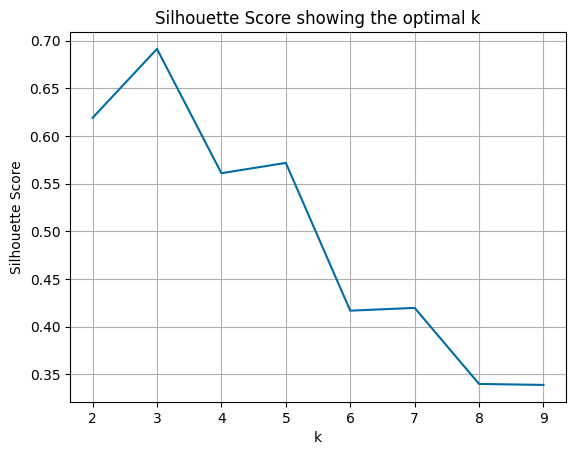

In [ ]:
k = 10
sils = []

for i in range(2, k):
  km = KMeans(i).fit(X)
  sils.append(silhouette_score(X, km.labels_))

plt.grid(True)
plt.plot(range(2, k), sils)
plt.xlabel('k');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score showing the optimal k');

# optimal K is with the highest Silhouette Score: k = 3

In [ ]:
spls = silhouette_samples(X, km.labels_)
spls[:20]

array([0.41439344, 0.41719156, 0.15099279, 0.42732195, 0.47041841,
       0.06620343, 0.54093769, 0.50833516, 0.13156279, 0.49572363,
       0.4900082 , 0.24106694, 0.54985315, 0.26673025, 0.11685689,
       0.24810018, 0.24395929, 0.41838498, 0.28540115, 0.4334713 ])

For n_clusters = 2 The average silhouette_score is : 0.6190798176270658
For n_clusters = 3 The average silhouette_score is : 0.6913486528517042
For n_clusters = 4 The average silhouette_score is : 0.5647351911462142
For n_clusters = 5 The average silhouette_score is : 0.4305478696159848
For n_clusters = 6 The average silhouette_score is : 0.3438562319259711


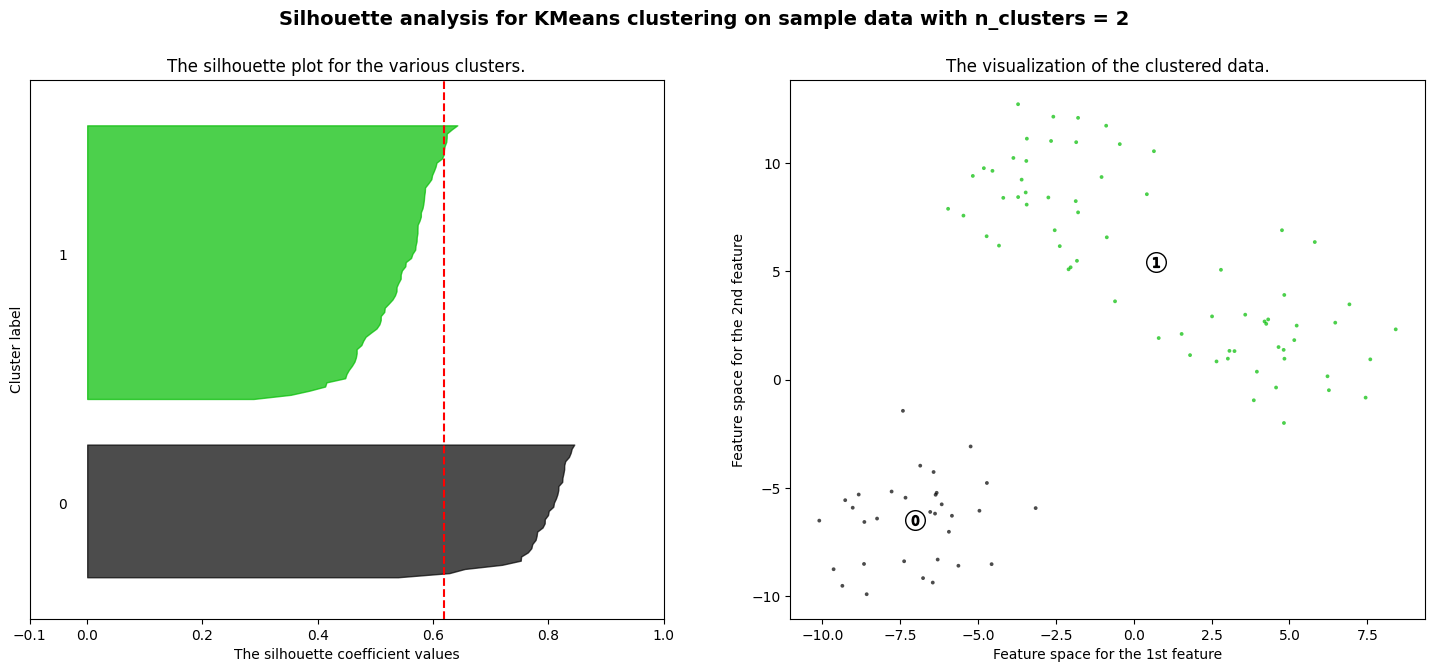

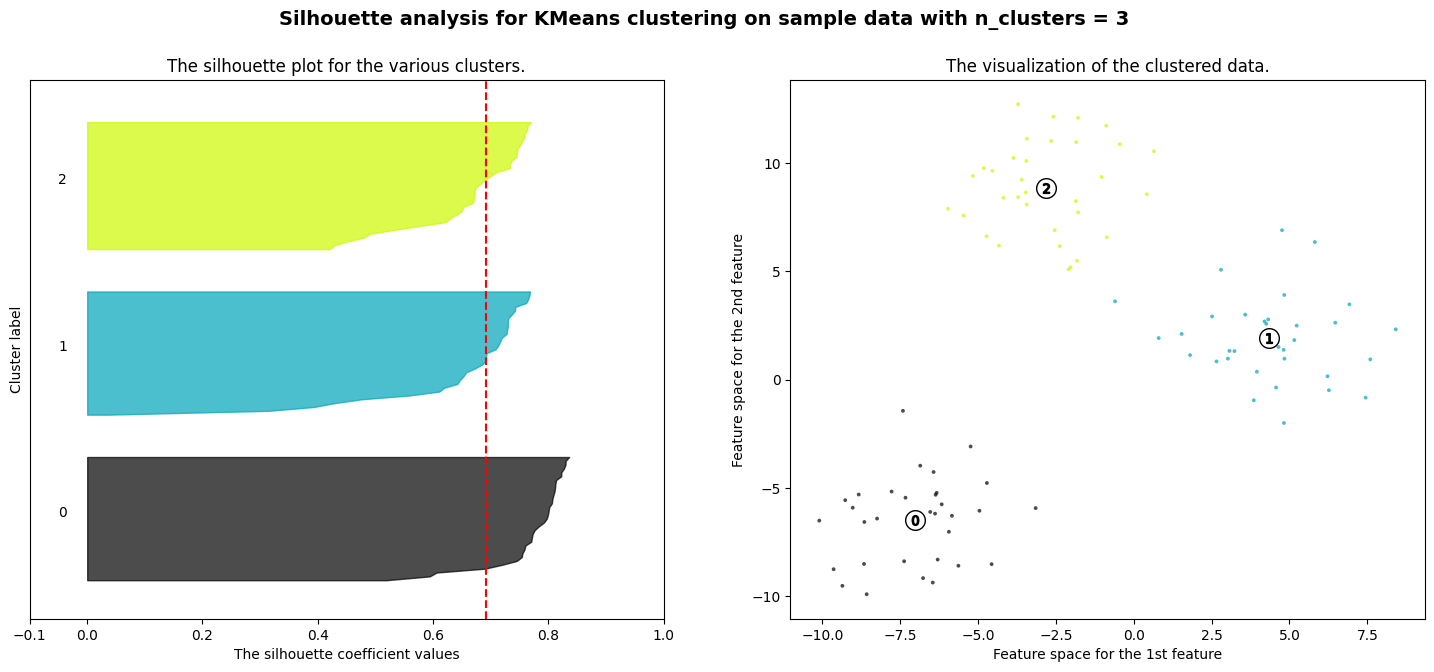

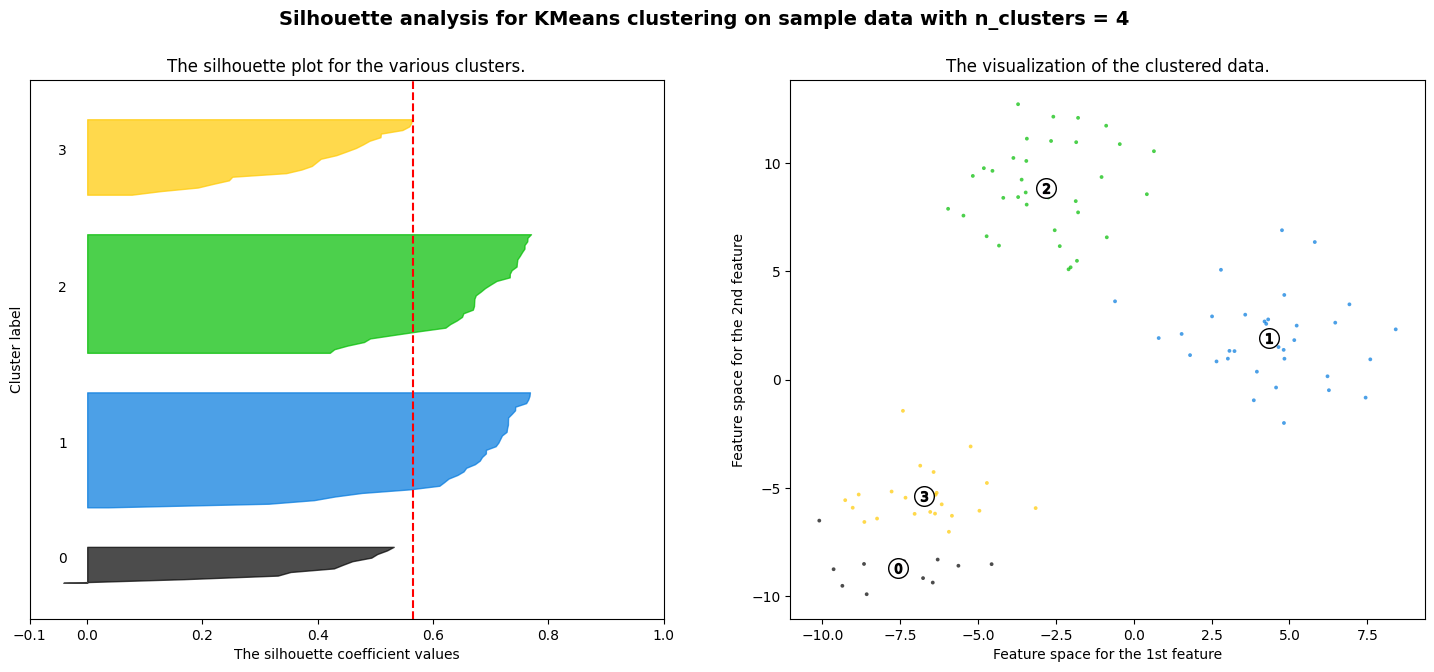

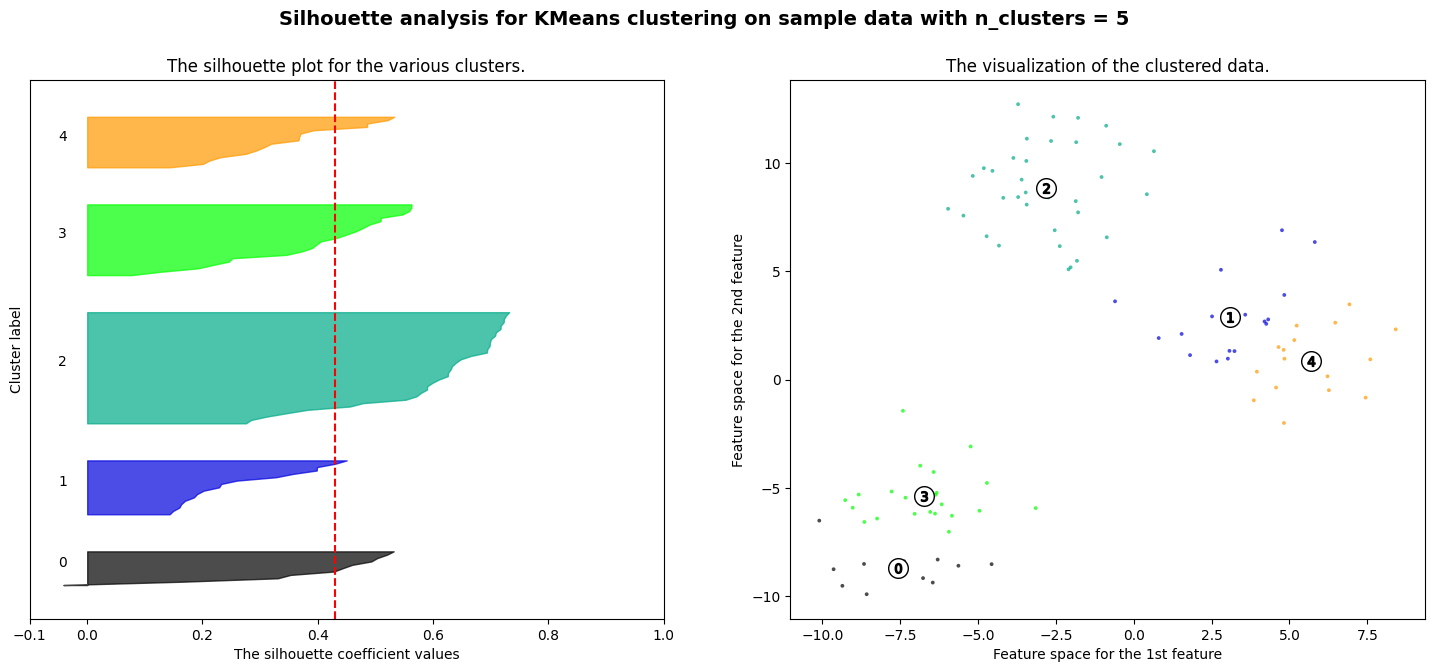

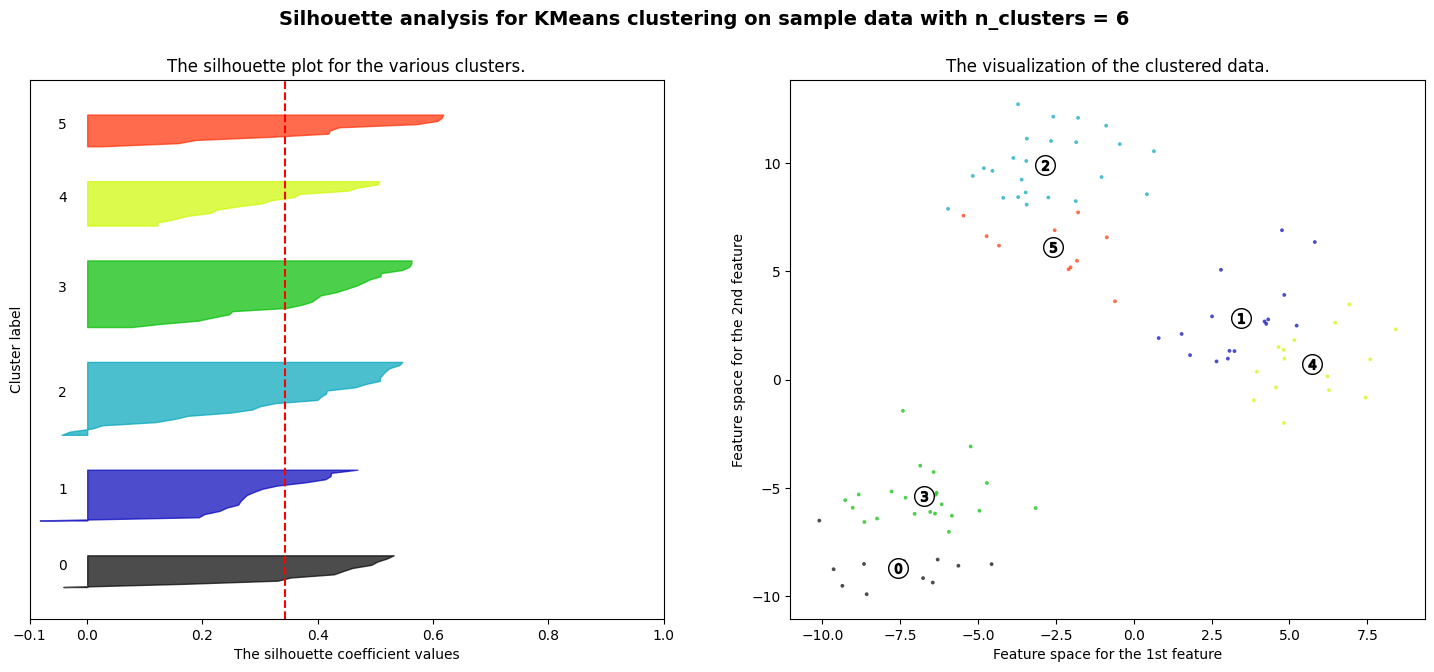

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()  # for better view

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


(3, 2)


<ipython-input-91-dffd8510c707>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(temp_x[:, 0], temp_x[:, 1], c=color)


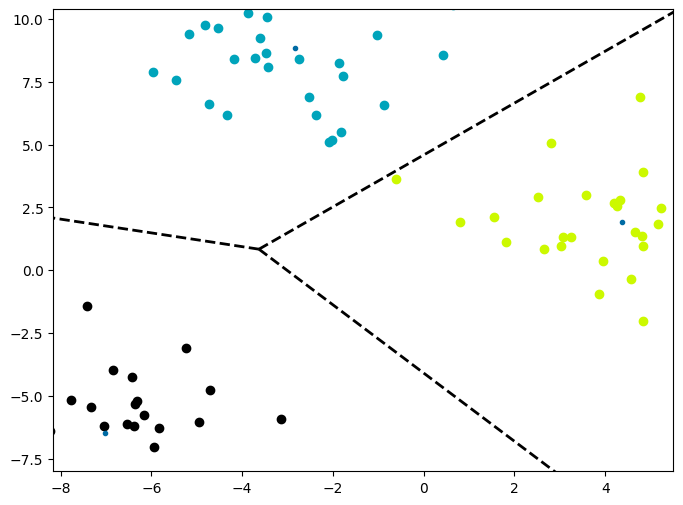

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d

optimal = 3
km = KMeans(optimal).fit(X)
centers = km.cluster_centers_
labels = km.labels_
vor = Voronoi(centers)

fig, ax = plt.subplots(figsize=(8, 6))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black', line_width=2, alpha=0.6)

for i in range(centers.shape[0]):
  temp_x = X[labels == i]
  color = cm.nipy_spectral(float(i) / optimal)
  ax.scatter(temp_x[:, 0], temp_x[:, 1], c=color)



In [ ]:
print(X.shape)
print(X.min(0).shape)
X.min(1).shape
X.size

(100, 2)
(2,)


200

In [ ]:
v = 3
c = np.random.uniform(3, 2, size=(4,2))

a = np.random.uniform(c.min(), c.max(), size = (v, c.shape[1]))

In [102]:
# v = 3
# c = np.random.uniform(3, 2, size=(4,2), random_states=1)
# # print(c)
# a = np.random.uniform(c.min(), c.max(), size = (v, c.shape[1]))
# print(a)
f = ((c[None,:,:] - a[:,None,:]) **2)
print(f)
d = f.sum(2)
print(d)
print(d.argmin(0))
g = d.argmin(0)

[[[8.60098183e-02 1.75092719e-02]
  [1.45967939e-01 3.68501618e-02]
  [2.82121229e-02 3.13482087e-02]
  [4.59449706e-02 1.52939022e-02]]

 [[1.09243898e-01 4.75285020e-05]
  [1.75815718e-01 2.78227370e-03]
  [1.70872755e-02 1.43168067e-03]
  [6.32996018e-02 6.91086361e-02]]

 [[5.24128003e-03 4.33522167e-02]
  [2.68517923e-04 7.17453933e-02]
  [2.84766994e-01 6.39804645e-02]
  [2.28987142e-02 2.28284923e-03]]]
[[0.10351909 0.1828181  0.05956033 0.06123887]
 [0.10929143 0.17859799 0.01851896 0.13240824]
 [0.0485935  0.07201391 0.34874746 0.02518156]]
[[0.08713467 0.14447667 0.14227558 0.07294289]]
[2 2 1 2]


In [140]:
def kmeans(k, X, max_iter=9999999):

  centers = np.random.uniform(X.min(), X.max(), size = (k, X.shape[-1]))
  old_labels = None

  for _ in range(max_iter):
    temp = ((X[None, :, :] - centers[:, None, :]) ** 2).sum(-1)  # (x-xc}**2 + (y-yc)**2
    labels = temp.argmin(0)

    if np.array_equal(labels, old_labels):
      break

    old_labels = labels
    for cluster in range(k):
      ith_cluster = X[cluster == labels]
      if ith_cluster.size == 0:
        centers[cluster] = np.zeros(X.shape[-1])
      else:
        centers[cluster] = ith_cluster.mean(0)

  return labels, centers

"""
For n_clusters = 2 The average silhouette_score is : 0.6190798176270658
For n_clusters = 3 The average silhouette_score is : 0.6913486528517042
For n_clusters = 4 The average silhouette_score is : 0.5647351911462142
For n_clusters = 5 The average silhouette_score is : 0.4305478696159848
For n_clusters = 6 The average silhouette_score is : 0.3438562319259711
"""


for i in range(2, 7):
  l, c = kmeans(i, X)
  print(silhouette_score(X, l))




0.6190798176270658
0.6913486528517042
0.5547067991790265
0.4529654438137898
0.3991091378746091


In [144]:
data = load_iris()
X_iris = data.data
print(X_iris.shape)
y_iris = data.target
print(y_iris.shape)

(150, 4)
(150,)


In [173]:
for i in range(2, 6):
  km = KMeans(i).fit(X_iris)
  labels = km.labels_
  centers = km.cluster_centers_

  print(i)
  print(inertia(X_iris, labels, centers))
  print(silhouette_score(X_iris, labels))


2
152.34795176035792
0.6810461692117462
3
78.8556658259773
0.551191604619592
4
57.25600931571816
0.4974551890173751
5
46.461172672672674
0.49123997967644784


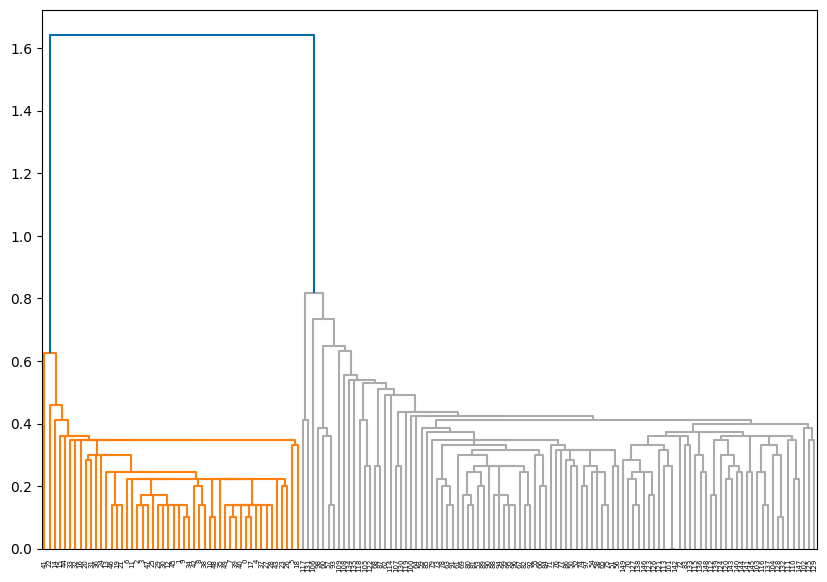

In [178]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_iris, 'single')
labelList = range(len(X_iris))
plt.figure(figsize=(10, 7))
dendrogram(linked,labels=labelList)
plt.show()